### Problem Statement <br>
#### Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

 
As a Data Scientist working on this dataset you have been asked to complete the following tasks:
1. Create clusters for the different types of flowers based on features  
2. Infer patterns based on clusters formed 


Throughout this demo, we will be using the Gaussian Mixture Model algorithm to group the products into clusters

Overview of the broad steps involved:
 1. Loading the data set and the required libraries
 2. Preparing data for model building
  *  Removing Null values from the data
  *  Sampling data points for Hierarchical clustering
  *  Applying standardization on the dataset
 3. Feature selection for product clustering
 4. Building clustering models
 5. Comparison analysis and summarization
 

### 1. Loading data set and the required libraries


In [ ]:
### 1.Loading the libraries and required libraries 
# Importing ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
sns.set()

In [ ]:
# Loading the wine dataset into pandas dataframes

iris_df = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')
iris_df['Species'] = iris_df.Species.map({'Iris-setosa':'1', 'Iris-virginica':'2', 'Iris-versicolor' : '3'})
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
# Class is indicative of clusters, but in real life, you'll not find this label, you'll have to infer it from the output of the clustering algorithm
iris_df.Species.unique()

array(['1', '3', '2'], dtype=object)

In [ ]:
#Using the describe function to check data distribution of the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2. Preparing the data for Clustering

1.  Dropping irrelevant columns

In [ ]:
# We drop the Class column here to avoid target leakage
temp = iris_df.drop(['Species','Id'], axis = 1).copy()

In [ ]:
#let us now look at the updated dataset
temp.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2.  ####   Scaling with StandardScaler 

As we learned before, scaling is essential for clustering algorithms. In this demo, we'll be using *standardization* as the scaling method

In [ ]:
#Scaling the values using the sklearn standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()         
temp_scaled = scaler.fit_transform(temp)

In [ ]:
#Let us now print the values after standardization
temp_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### 3. Building Clustering Models - Part II

#### 1.   Gaussian Mixture Model

Now that our data has been sampled and scaled, we can start with applying the GMM algorithm. 







In [ ]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=4)
GMM.fit(temp_scaled)

GaussianMixture(n_components=4)

In [ ]:
GMM.means_

array([[ 0.84973184, -0.24369627,  0.97867288,  1.03341191],
       [-1.18255821,  0.47462556, -1.32076875, -1.31353463],
       [-0.65948298,  1.61955841, -1.27128719, -1.13166253],
       [ 0.0868636 , -0.63902238,  0.25191309,  0.12929406]])

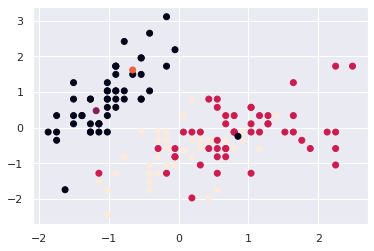

In [ ]:
plt.scatter(temp_scaled[:,0], temp_scaled[:,1], c = list(iris_df.Species.astype(int)))
plt.scatter(GMM.means_[:,0], GMM.means_[:,1], c = [1,2,3,4])

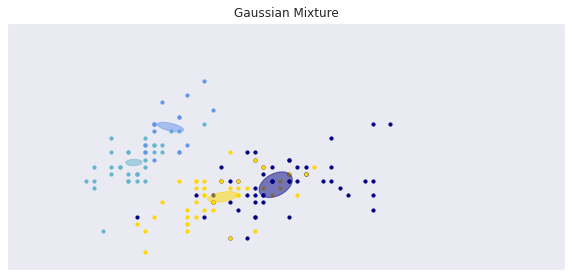

In [ ]:
# Visualizing the GMM ellipses 
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize = (10,10))
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 10, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-3.0, 5.0)
    plt.ylim(-3.0, 5.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plot_results(temp_scaled, GMM.predict(temp_scaled), GMM.means_, GMM.covariances_, 1, "Gaussian Mixture")